# E-COMMERCE
## `Machine Learning`

### 📦 LIBRAIRIES
---

In [2]:
# --- OPERATING SYSTEM ---------------------------------------------------------
import os


# --- DATA --------------------------------------------------------------------
# --- Pandas
import pandas as pd
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 500)

# --- Numpy
import numpy as np



# --- PLOTS -------------------------------------------------------------------
# --- Matplotlib
import matplotlib.pyplot as plt

# --- Seaborn
import seaborn as sns
sns.set_theme(style="white")

# --- Plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "vscode"
from plotly.subplots import make_subplots



# --- MACHINE LEARNING --------------------------------------------------------
# # --- Dataset Splitting
from sklearn.model_selection import train_test_split

# # --- Missing Values Replacing
from sklearn.impute import SimpleImputer

# # --- Dataset Splitting
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

# # --- Label Encoding
from sklearn import preprocessing 
from category_encoders import CatBoostEncoder



# --- MODELS ------------------------------------------------------------------
# # --- Regression
from sklearn.linear_model import LinearRegression

# # --- Classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgbm

from sklearn.pipeline import Pipeline



# --- MATRIX ------------------------------------------------------------------
# # --- Matrix
from sklearn.metrics import confusion_matrix

# # --- Scoring
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# # --- Tree
from sklearn import tree

### 📥 IMPORT
---

In [3]:
encoding_norm = "UTF-8"
separator = ","

cols_dates_to_parse_1 = ['order_created_at', 'order_shipped_at', 'order_delivered_at', 'order_returned_at']
cols_dates_to_parse_2 = ['event_created_at']

file_name_1= "../02_Data_output/Orders.csv"
file_name_2= "../02_Data_output/Clients.csv"

imp1 = pd.read_csv(file_name_1, sep= separator, low_memory= False, encoding= encoding_norm, parse_dates= cols_dates_to_parse_1)
imp2 = pd.read_csv(file_name_2, sep= separator, low_memory= False, encoding= encoding_norm, parse_dates= cols_dates_to_parse_2)

In [4]:
df1 = imp1.copy()
df2 = imp2.copy()

### 💻 PREPARATION
---

#### ◻ Merge

In [5]:
cols = df2.columns.difference(df1.columns).to_list()
cols.append('user_id')

df = df1.merge(df2[cols],
               how= 'left',
               on= ['user_id']
              )

In [6]:
# encoding_norm = "UTF-8"
# separator = ","
# df_to_export = df.head(100000)
# df_to_export.to_csv(r'..\02_Data_output\ecommerce.csv', sep= separator, encoding= encoding_norm, index = None, header= True)

#### ◻ Columns Adding

In [7]:
# --- Order Dates
df['order_created_at'] = pd.to_datetime(df['order_created_at']).dt.tz_localize(None)
df['order_year'] = df['order_created_at'].dt.year
df['order_month'] = df['order_created_at'].dt.month

# --- User_Gender Encoding
df['churn'] = df['order_status'].apply(lambda x: 1 if (x == 'Returned') | (x == 'Cancelled') else 0)

### 💻 MACHINE LEARNING
---

#### ◻ Features List

In [8]:
cat_features = ['distribution_center_name',
                'event_browser',
                'event_traffic_source'
                ]

num_features = ['order_sale_price',
                'order_preparation_time',
                'order_delivery_time',
                'product_cost',
                'user_age',
                'order_year',
                'order_month'
                ]

features_list = cat_features + num_features

df = df.dropna(subset= features_list + ['churn'])

#### ◻ Dataset Splitting

In [9]:
# --- Features to analyse
features = features_list
X = df.loc[:, features]

# --- Target
y = df['churn']

# --- Dataframe splitting : Train & Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

# --- Display
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2829593, 10)
X_test shape: (707399, 10)
y_train shape: (2829593,)
y_test shape: (707399,)


#### ◻ Imputing Missing Values

##### 🔹 [Checking]

In [10]:
# --- Check before
X_train.isnull().any()

distribution_center_name    False
event_browser               False
event_traffic_source        False
order_sale_price            False
order_preparation_time      False
order_delivery_time         False
product_cost                False
user_age                    False
order_year                  False
order_month                 False
dtype: bool

##### 🔹 [Filling]

In [11]:
# # --- Filling the missing values

## --- Numerical values
# numerical_cols_to_fill= ['']

# si_numerical = SimpleImputer(strategy = 'mean')
# X_train[numerical_cols_to_fill] = si_numerical.fit_transform(X_train[numerical_cols_to_fill])
# X_test[numerical_cols_to_fill] = si_numerical.transform(X_test[numerical_cols_to_fill])

# ## --- Categorical values
# categorical_cols_to_fill= ['']

# si_categorical = SimpleImputer(strategy = 'constant', fill_value = 'Unknown')
# X_train[categorical_cols_to_fill] = si_categorical.fit_transform(X_train[categorical_cols_to_fill])
# X_test[categorical_cols_to_fill] = si_categorical.transform(X_test[categorical_cols_to_fill])

# # --- Check after
# X_train.isnull().any()

#### ◻ Dataset Normalization

In [12]:
# --- Categorical Features
categorical_features = cat_features
categorical_transformer = OneHotEncoder(drop="first")

# --- Numerical Features
numerical_features = num_features
numerical_transformer = StandardScaler()


# --- Features Transformation
FeatureEncoder = ColumnTransformer(transformers = [
                                                    ('cat', categorical_transformer, categorical_features),
                                                    ('num', numerical_transformer, numerical_features)
                                                  ])

# --- X transformation
X_train = FeatureEncoder.fit_transform(X_train)
X_test = FeatureEncoder.transform(X_test)

# Y à transformer si non numérique
# Y_train = LabelEncoder.fit_transform(Y_train)
# Y_test = LabelEncoder.transform(Y_test)


# --- Display
X_train

array([[ 0.        ,  1.        ,  0.        , ...,  0.7527471 ,
         0.68596546,  1.37955051],
       [ 0.        ,  0.        ,  0.        , ..., -1.07016247,
         0.68596546, -0.55579994],
       [ 0.        ,  0.        ,  0.        , ..., -0.12930592,
        -0.20757252, -0.83227857],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -1.59939427,
        -1.1011105 ,  1.37955051],
       [ 0.        ,  0.        ,  0.        , ...,  1.57599658,
        -1.1011105 , -0.00284267],
       [ 0.        ,  0.        ,  0.        , ..., -1.36418014,
         0.68596546, -0.55579994]])

#### ◻ Model Training

In [13]:
# --- Model training

# model = LogisticRegression(random_state= 42, max_iter= 400)
# model = LogisticRegression(random_state= 42, max_iter= 200, solver= 'saga', penalty= 'l1')
# model = RandomForestClassifier(random_state= 42, n_estimators= 100,  max_depth= 3)
model = DecisionTreeClassifier(max_depth= 30)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#### ◻ Scoring

In [14]:
# --- Model
print('Model Scoring')
print(f'Train Score : {model.score(X_train, y_train):.4f}')
print(f'Test Score :  {model.score(X_test, y_test):.4f}')


# --- Classification Report
print("")
print(classification_report(y_test, y_pred))

Model Scoring
Train Score : 0.9215
Test Score :  0.9208

              precision    recall  f1-score   support

           0       0.91      0.98      0.95    505437
           1       0.94      0.77      0.85    201962

    accuracy                           0.92    707399
   macro avg       0.93      0.88      0.90    707399
weighted avg       0.92      0.92      0.92    707399



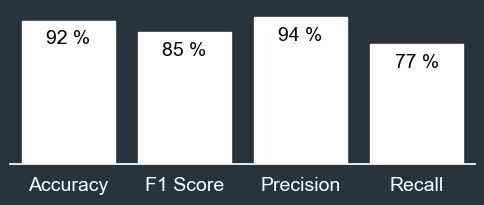

In [83]:
# --- Data
multi = 100
comanum = 3

scoring_data = pd.DataFrame(dict({
    "Score" : ['Accuracy', 'F1 Score', 'Precision', 'Recall' ],
    "Test" : [np.round(accuracy_score(y_test, y_pred) * multi, comanum),
              np.round(f1_score(y_test, y_pred) * multi, comanum),
              np.round(precision_score(y_test, y_pred) * multi, comanum),
              np.round(recall_score(y_test, y_pred) * multi, comanum)]
}))


color = ['#658bbf']
color = ['White']
edgecolor = 'Black'
edgecolor = 'White'

# --- Chart Plotting
plt.figure(figsize=(6, 2))

# Tracer le graphique en barres
ax = sns.barplot(x= "Score",
                 y= "Test",
                 data= scoring_data,
                 color= color[0],
                 edgecolor= edgecolor
                )


# --- Chart Aesthetics
sns.despine()

# ax.spines['bottom'].set_color(None)
# ax.get_xaxis().set_visible(False)
# ax.xaxis.set_ticks([])

ax.spines['left'].set_color(None)
ax.get_yaxis().set_visible(False)
ax.yaxis.set_ticks([])

ax.spines['left'].set_color('#29333b')
ax.spines['bottom'].set_color('white')
ax.set_facecolor('#29333b') 
plt.gcf().set_facecolor('#29333b')

ax.tick_params(axis='x', labelsize= 14)

for label in ax.get_xticklabels():
    label.set_color('white')

# --- Chart Labels
plt.xlabel(None)
plt.ylabel(None)
# plt.title('Model results analysis', fontsize= 16, pad= 20)


# --- Bars Labels
space= 15
for i, v in enumerate(scoring_data['Test']):
    plt.text(i, v - space,  f"{v :,.0f} %", ha= 'center', color= 'black', fontsize= 14)


# --- Display
plt.show()

#### ◻ Confusion Matrix

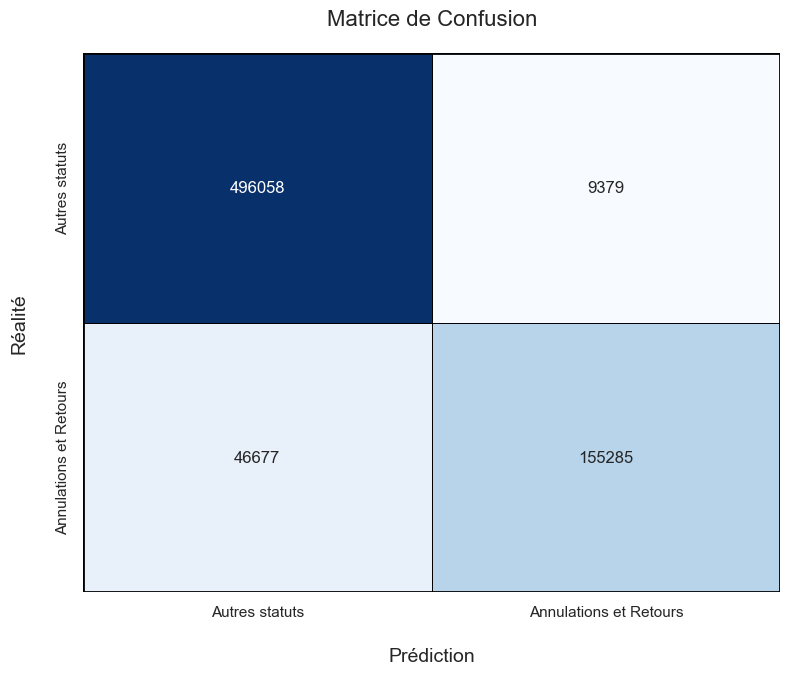

In [89]:
# --- Confusion Matrix
matrix = confusion_matrix(y_test, y_pred)


# --- Matrix Plotting
plt.figure(figsize= (9, 7))

ax = sns.heatmap(matrix,
                 annot= True,
                 fmt= 'd',
                 cmap= 'Blues',
                 xticklabels= ['Autres statuts', 'Annulations et Retours'],
                 yticklabels= ['Autres statuts', 'Annulations et Retours'],
                #  xticklabels= model.classes_,
                #  yticklabels= model.classes_
                linecolor= 'black',
                linewidths= 0.5,
                cbar= False
                )


# --- Matrix Aesthetics
import matplotlib.patches as patches
ax.add_patch(patches.Rectangle((0, 0), matrix.shape[1], matrix.shape[0], fill=False, edgecolor='black', linewidth=2))


# --- Matrix Labels
plt.xlabel('Prédiction', fontsize= 14, labelpad= 20)
plt.ylabel('Réalité', fontsize= 14, labelpad= 20)
plt.title('Matrice de Confusion', fontsize= 16, pad= 20)


# --- Display
plt.show()

#### ◻ Feature Importances

In [26]:
FeatureEncoder.get_feature_names_out()

array(['cat__distribution_center_name_Chicago IL',
       'cat__distribution_center_name_Houston TX',
       'cat__distribution_center_name_Los Angeles CA',
       'cat__distribution_center_name_Memphis TN',
       'cat__distribution_center_name_Mobile AL',
       'cat__distribution_center_name_New Orleans LA',
       'cat__distribution_center_name_New York NY',
       'cat__distribution_center_name_Philadelphia PA',
       'cat__distribution_center_name_Savannah GA',
       'cat__event_browser_Firefox', 'cat__event_browser_IE',
       'cat__event_browser_Other', 'cat__event_browser_Safari',
       'cat__event_traffic_source_Email',
       'cat__event_traffic_source_Facebook',
       'cat__event_traffic_source_Organic',
       'cat__event_traffic_source_YouTube', 'num__order_sale_price',
       'num__order_preparation_time', 'num__order_delivery_time',
       'num__product_cost', 'num__user_age', 'num__order_year',
       'num__order_month'], dtype=object)

In [54]:
index_names = ['Distr. Center : Chicago, IL',
               'Distr. Center : Houston, TX',
               'Distr. Center : Los Angeles, CA',
               'Distr. Center : Memphis, TN',
               'Distr. Center : Mobile, AL',
               'Distr. Center : New Orleans, LA',
               'Distr. Center : New York, NY',
               'Distr. Center : Philadelphia, PA',
               'Distr. Center : Savannah, GA',
               'Browser : Firefox',
               'Browser : IE',
               'Browser : Other',
               'Browser : Safari',
               'Traffic Source : Email',
               'Traffic Source : Facebook',
               'Traffic Source : Organic',
               'Traffic Source : YouTube',
               'Order Sale Price',
               'Order Preparation Time',
               'Order Delivery Time',
               'Product Cost',
               'User Age',
               'Order Year',
               'Order Month'
              ]

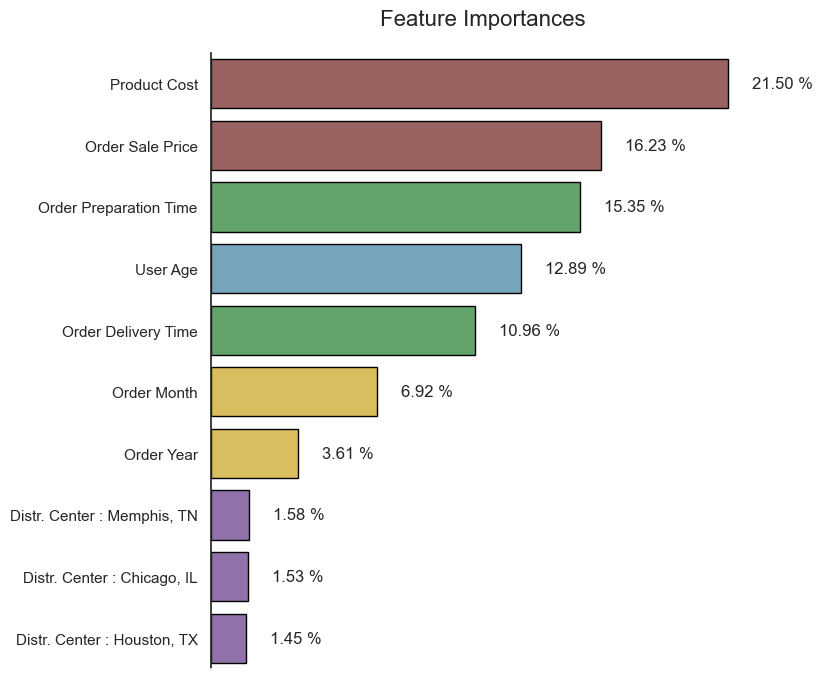

In [104]:
# --- Feature Importances
data = pd.DataFrame(model.feature_importances_,
                    # index= FeatureEncoder.get_feature_names_out(),
                    index= index_names,
                    columns= ['importance']).sort_values('importance', ascending=False)

data = data.head(10)

# --- Bars Aesthetics
palette = ['#a45959',
           '#a45959',
           '#58ae65',
           '#6ba9c8',
           '#58ae65',
           '#efc849',
           '#efc849',
           '#9367b3',
           '#9367b3',
           '#9367b3'
          ]
edgecolor = 'black'


# --- Chart Plotting
plt.figure(figsize=(7, 8))

ax = sns.barplot(x= data.importance,
                 y= data.index,
                 palette= palette,
                 hue= data.index,
                #  color = color[0],
                 edgecolor= edgecolor,
                 legend= False
                )


# --- Chart Aesthetics
sns.despine()

ax.spines['bottom'].set_color(None)
ax.get_xaxis().set_visible(False)
ax.xaxis.set_ticks([])

# ax.spines['left'].set_color(None)
# ax.get_yaxis().set_visible(False)
# ax.yaxis.set_ticks([])


# --- Chart Labels
plt.xlabel(None)
plt.ylabel(None)
plt.title('Feature Importances', fontsize= 16, pad= 20)


# --- Bars Labels
space= 0.01
for i, v in enumerate(data['importance']):
    plt.text(v + space, i,  f"{v * 100:,.2f} %", va= 'center')


# --- Display
plt.show()

In [60]:
print(f'Le modèle a {len(model.feature_importances_)} feature importances')

Le modèle a 24 feature importances
